In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [113]:
# this function create a cluster of two features
def Create_Cluster(mean1,mean2,std1,std2,size_of_cluster):

  # Just seting a seed
  np.random.seed(14009)

  # Here I am generating two clusters with different means and same standard deviation

  #cluster with mean & std for feature1 is mean1 and std1, where for feature2 is mean2 & mean2. and size of cluster is 500 X 2 .
  cluster = np.random.normal([mean1,mean2], [std1,std2], size=(size_of_cluster, 2))
  return cluster
# this function create a X & Y form the two cluster
def Create_X_Y(cluster1,cluster2):

  Y = [-1]*len(cluster1)+[1]*len(cluster2)
  Y = np.array(Y)
  X = np.vstack([cluster1, cluster2])

  # Get the indices in a shuffled order
  indices = np.random.permutation(len(X))

  # Use the shuffled indices to shuffle both x and y
  X = X[indices]
  Y = Y[indices]

  return (X,Y)

# this function creates a plot for the given dataset
def Create_plot(data,labels):

  df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
  df['Label'] = labels

  # Plot the df

  # Set Seaborn style
  sns.set(style='whitegrid', palette='pastel')
  plt.figure()
  # Create a scatter plot with color gradient
  scatter_plot = sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, palette='deep', s=100, alpha=0.9)

  # Set plot title and labels
  plt.title('Scatter Plot of Normally Distributed Data')
  plt.xlabel('Feature1')
  plt.ylabel('Feature2')
  plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))


  # Show the plot
  plt.show()

def Create_plot_for_classification(ax,data,labels,W):

  b, w1, w2 = W
  df = pd.DataFrame(data, columns=['Bias','Feature1', 'Feature2'])
  df['Label'] = labels

  # Plot the df
  sns.set(style='whitegrid', palette='pastel')
  scatter_plot = sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, palette='deep', s=100, alpha=0.9,ax=ax)

  ax.set_title('Scatter Plot of Normally Distributed Data')
  ax.set_xlabel('Feature1')
  ax.set_ylabel('Feature2')
  ax.legend()

  # Plot the decision boundary
  x_min, x_max = df['Feature1'].min() + 0.3, df['Feature1'].max() - 0.3
  xx = np.linspace(x_min, x_max, 100)
  if w2==0:
    w2=0.00001
  yy = - (w1 / w2) * xx - (b / w2)

  ax.plot(xx, yy, color='red', linestyle='dashed', linewidth=2, label='Decision Boundary')
  ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

In [114]:
# this function is used to find the minimum euclidean distance between two cluster
def find_min_distance(cluster1,cluster2):

  # initialize minimum distance with infinity
  minimum_dist = float('inf')

  for point1 in cluster1:

    x1 = point1[0]
    y1 = point1[1]

    for point2 in cluster2:

      x2 = point2[0]
      y2 = point2[1]

      minimum_dist = min( ((x2-x1)**2 + (y2-y1)**2) ** 0.5 , minimum_dist)

  return minimum_dist

In [115]:
def Perceptron_learning_algorithm(x, y, w, epochs):

  # store wrong classification at each iteration.
  k = []


  for i in range(epochs):

    No_of_wrong_classification = 0

    # Calculate y_pred for each data point and if it is missclassifide update the weight w
    for i in range(len(x)):


      y_pred = x[i].dot(w)
      #print(i,y_pred,y[i],x[i],w)
      #print(y_pred,y[i])
      if y_pred * y[i] <= 0:
        #print(i,y_pred,y[i],x[i],w)
        w = w +  y[i] * x[i]
        No_of_wrong_classification += 1

    k.append(No_of_wrong_classification)

    if k[-1] == 0:
      break

  return w,k

 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
the level of separability : 0.11505271648354838
_______Running Perceptron_learning_algorithm_______
Total numbers of changes in weights (k) : 11
Total numbers of epochs for algorithm run : 1
new weights w0/bias = -1.0 w1 = 1.9450535887408038 w2 = 1.94277367421762


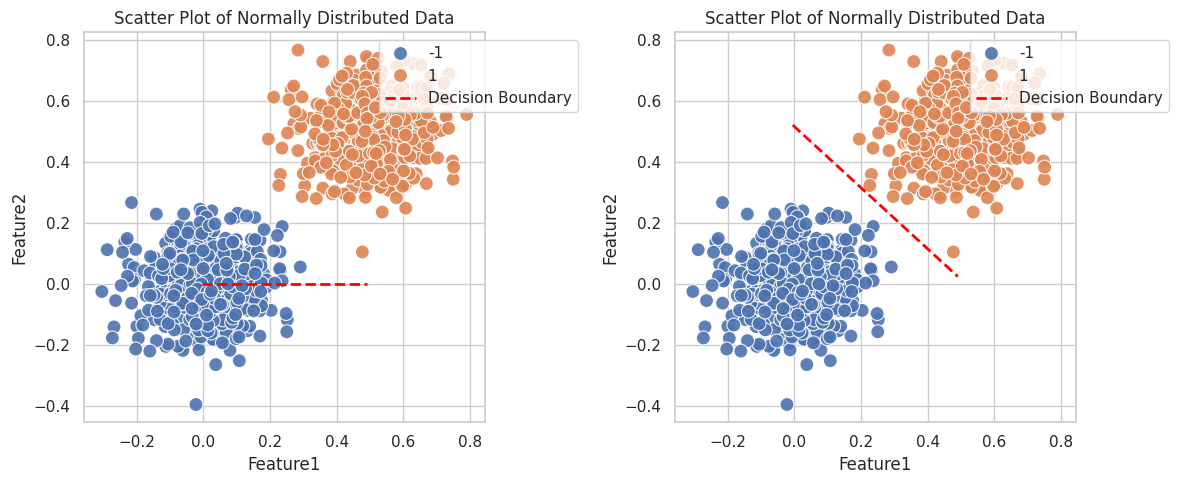

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
the level of separability : 0.25104728033993506
_______Running Perceptron_learning_algorithm_______
Total numbers of changes in weights (k) : 7
Total numbers of epochs for algorithm run : 1
new weights w0/bias = -1.0 w1 = 1.4082209210623544 w2 = 1.7022258258961067


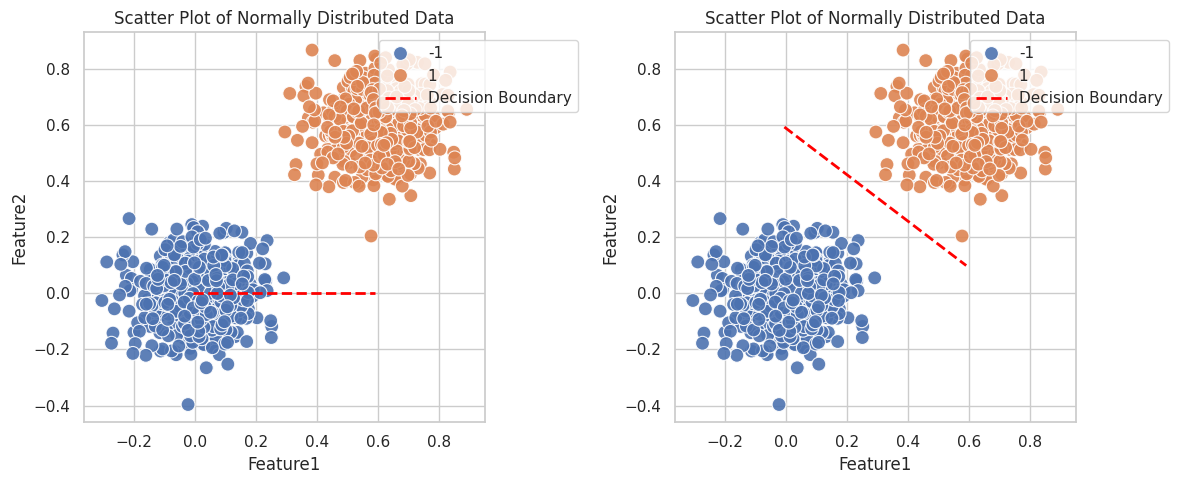

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
the level of separability : 0.3845438253993934
_______Running Perceptron_learning_algorithm_______
Total numbers of changes in weights (k) : 5
Total numbers of epochs for algorithm run : 1
new weights w0/bias = -1.0 w1 = 1.4857189592909523 w2 = 1.2143148942975814


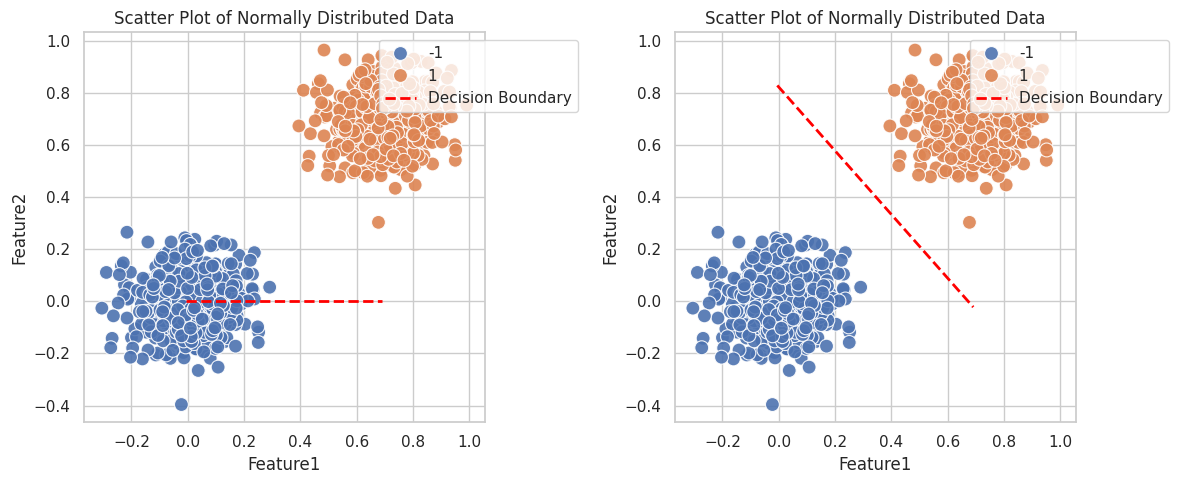

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
the level of separability : 0.5222290401150825
_______Running Perceptron_learning_algorithm_______
Total numbers of changes in weights (k) : 5
Total numbers of epochs for algorithm run : 1
new weights w0/bias = -1.0 w1 = 1.1992142441156686 w2 = 1.5262699534983668


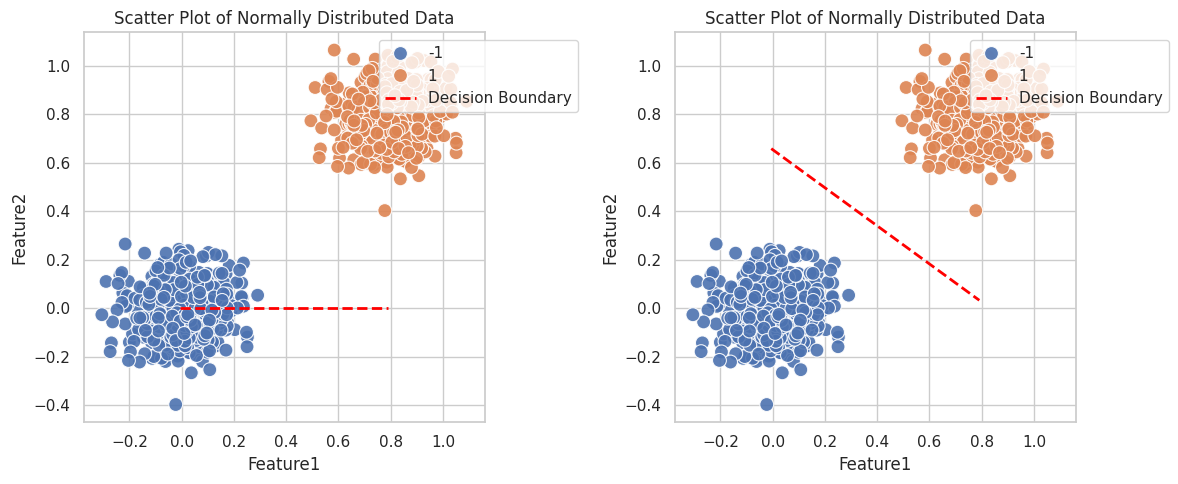

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
the level of separability : 0.6614925449513711
_______Running Perceptron_learning_algorithm_______
Total numbers of changes in weights (k) : 3
Total numbers of epochs for algorithm run : 1
new weights w0/bias = -1.0 w1 = 0.9121593667007161 w2 = 1.0061315941632127


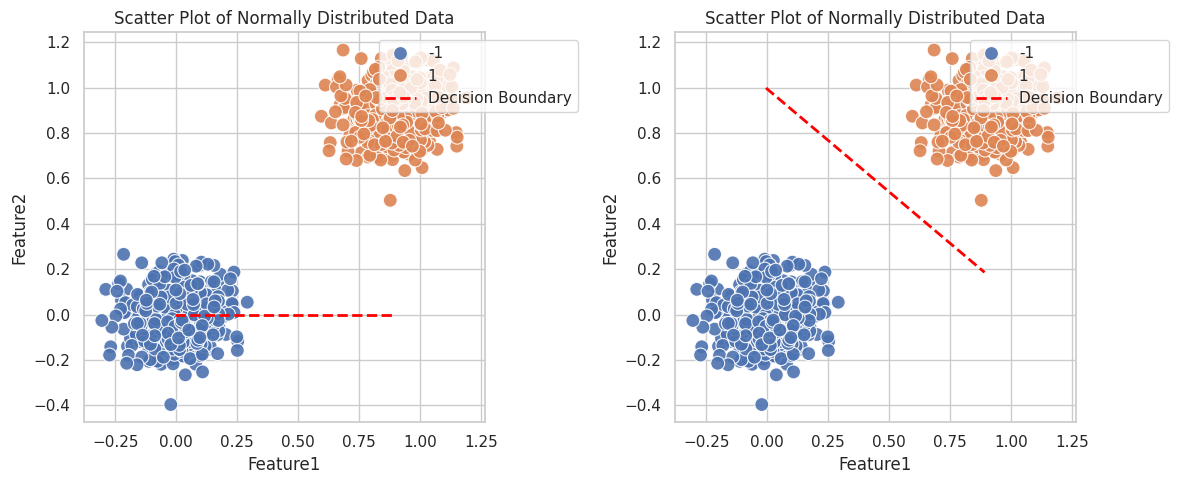

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==


In [116]:
all_gamma_values = []
all_k_values = []

cluster1 = Create_Cluster(0,0,0.1,0.1,500)
for i in range(5):

  cluster2 = Create_Cluster(0.5+i*0.1,0.5+i*0.1,0.1,0.1,500)

  fig, axes = plt.subplots(1, 2, figsize=(12, 5))


  X,Y = Create_X_Y(cluster1,cluster2)
  #Create_plot(X,Y)
  # Here I have Initialized W with Zeros could go for random also which i did in next question.

  gamma = find_min_distance(cluster1,cluster2)
  all_gamma_values.append(gamma)
  X = np.column_stack([np.ones(X.shape[0]), X])
  W = np.zeros(X.shape[1])

  W,K = Perceptron_learning_algorithm(X,Y, W, 100000)
  all_k_values.append(sum(K))

  print(" ")
  print(" ")
  print("==XX=="*20)
  print(" ")
  print("the level of separability :",gamma)
  print("_______Running Perceptron_learning_algorithm_______")
  print("Total numbers of changes in weights (k) :",sum(K))
  print("Total numbers of epochs for algorithm run :",len(K)-1)
  print("new weights w0/bias = "+str(W[0])+" "+"w1 = "+str(W[1])+" "+"w2 = "+str(W[2]))

  # Plot Graph
  sns.set(style='whitegrid', palette='pastel')
  Create_plot_for_classification(axes[0],X,Y,np.zeros(X.shape[1]))
  Create_plot_for_classification(axes[1],X,Y,W)
  plt.tight_layout()
  plt.show()

  print("==XX=="*20)

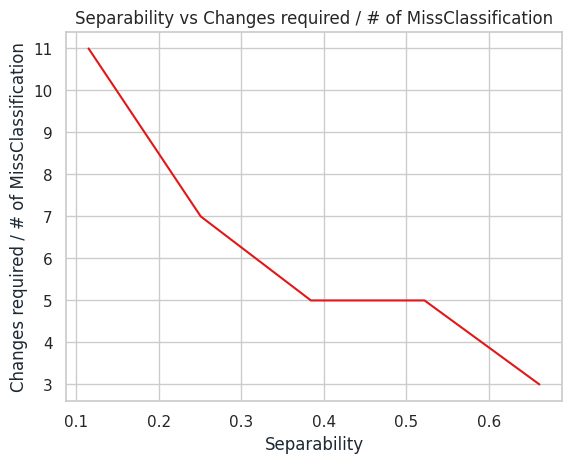

In [117]:
# Separability vs Changes required plot
plt.plot(all_gamma_values,all_k_values,color='#E21717', label='K')
plt.title("Separability vs Changes required / # of MissClassification")
plt.xlabel('Separability', color='#1C2833')
plt.ylabel('Changes required / # of MissClassification', color='#1C2833')
plt.show()

In [118]:
# Sigmoid function for binary classification
def Create_X_Y(cluster1,cluster2):

  Y = [0]*len(cluster1)+[1]*len(cluster2)
  Y = np.array(Y)
  X = np.vstack([cluster1, cluster2])

  # Get the indices in a shuffled order
  indices = np.random.permutation(len(X))

  # Use the shuffled indices to shuffle both x and y
  X = X[indices]
  Y = Y[indices]

  return (X,Y)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_gradient(X, y, weights):
    m = len(y)
    z = np.dot(X, weights)
    y_pred = sigmoid(z)
    gradient = np.dot(X.T, (y_pred - y)) / m
    return gradient

# Gradient descent update equation
def gradient_descent(X, y, learning_rate=0.05, epochs=10000):

    m, n = X.shape
    a=5
    weights = np.random.rand(n)
    losses = [1000]
    pre_loss = 1000
    fig, axes = plt.subplots(figsize=(12, 5))
    breaking_flag = 0
    for epoch in range(epochs):
        gradient = compute_gradient(X, y, weights)
        weights -= learning_rate * gradient

        # Calculate and store the loss
        y_pred = sigmoid(np.dot(X, weights))
        loss = binary_cross_entropy_loss(y, y_pred)
        losses.append(loss)
        #print((pre_loss-loss),loss)

        if abs(pre_loss-loss)<= 0.00001:
          breaking_flag = 1
        else:
          pre_loss = loss

        if epoch%a !=0 and breaking_flag!=1 and epoch!=0:
          continue
        a= int(a*1.5)
        print(" ")
        print(" ")
        print("==XX=="*20)
        print(" ")
        print("_______Running Gradient decent_______")
        print("new weights w0/bias = "+str(weights[0])+" "+"w1 = "+str(weights[1])+" "+"w2 = "+str(weights[2]))
        print("Loss at this epoch "+str(epoch)+" "+" is = "+str(loss))

        # Plot Graph
        sns.set(style='whitegrid', palette='pastel')
        fig, axes = plt.subplots(1, 1, figsize=(12, 5))
        Create_plot_for_classification(axes,X,Y,weights)
        plt.tight_layout()
        plt.show()

        print("==XX=="*20)

        if breaking_flag == 1:
          return weights , losses

    return weights, losses

def binary_cross_entropy_loss(y_true, y_pred):

    epsilon = 1e-15  # Small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid log(0)

    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = 0.6062535665917045 w1 = 0.1792497786703276 w2 = 0.6001669726102834
Loss at this epoch 0  is = 0.6331187339823587


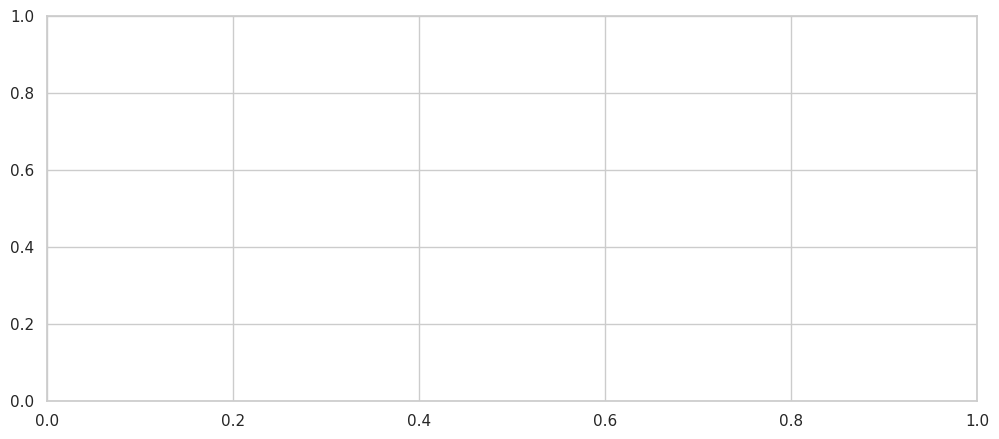

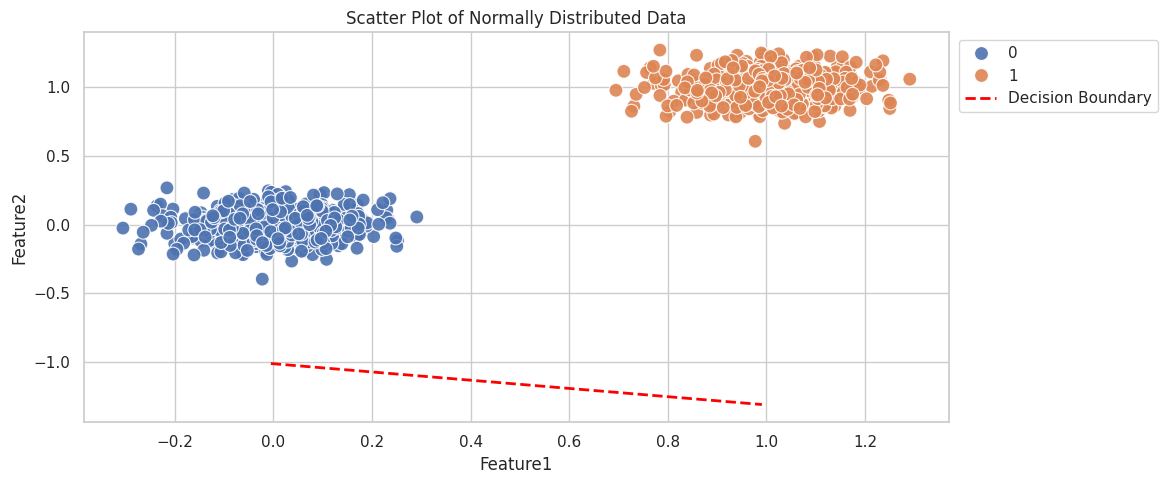

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = 0.529427694558211 w1 = 0.21425494381425464 w2 = 0.6346399350742861
Loss at this epoch 7  is = 0.6094055549356453


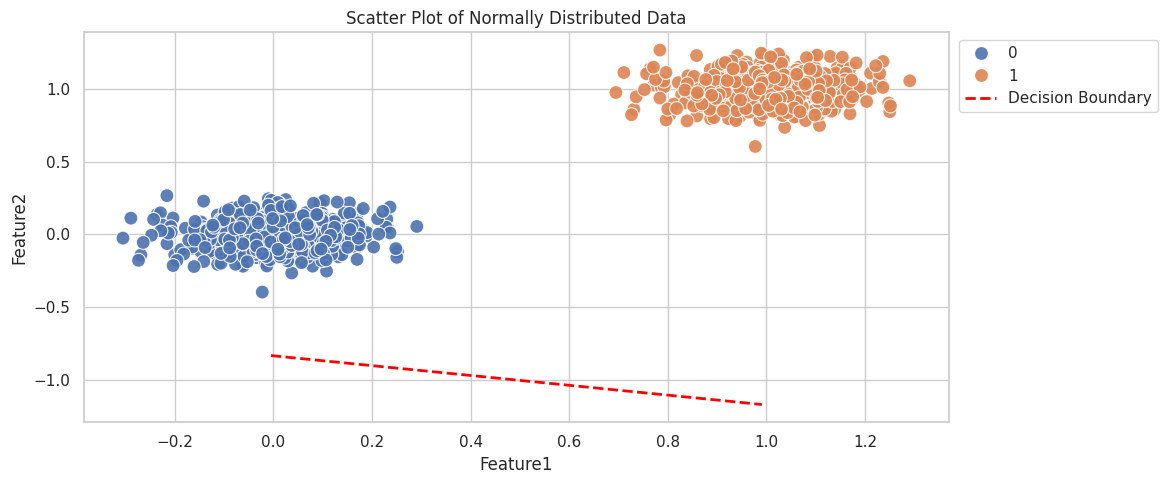

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = 0.4975031652472116 w1 = 0.22930435824809653 w2 = 0.6494636289577802
Loss at this epoch 10  is = 0.5996561211444175


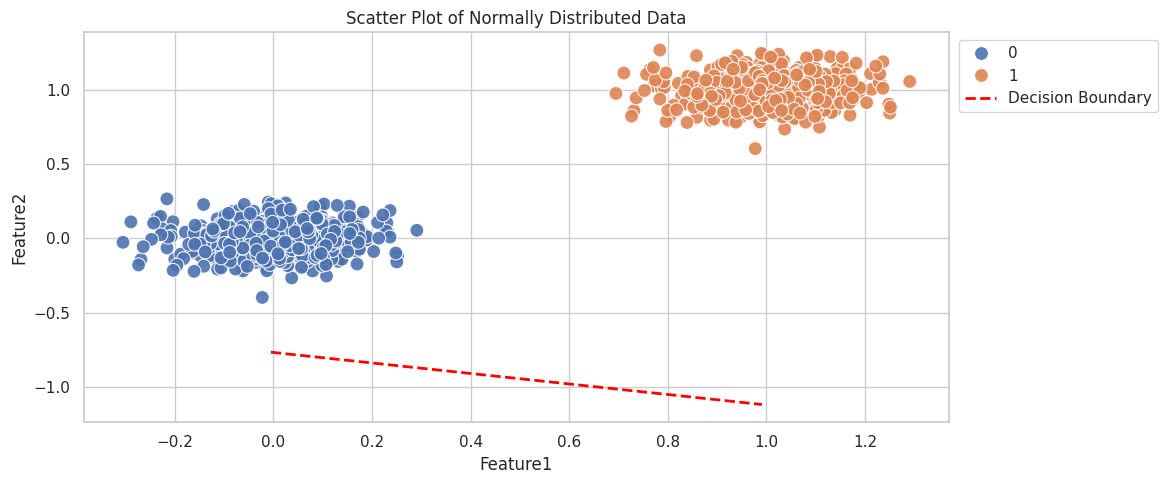

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = 0.4455803459132148 w1 = 0.25442127491518146 w2 = 0.6742075704770312
Loss at this epoch 15  is = 0.5839310695285096


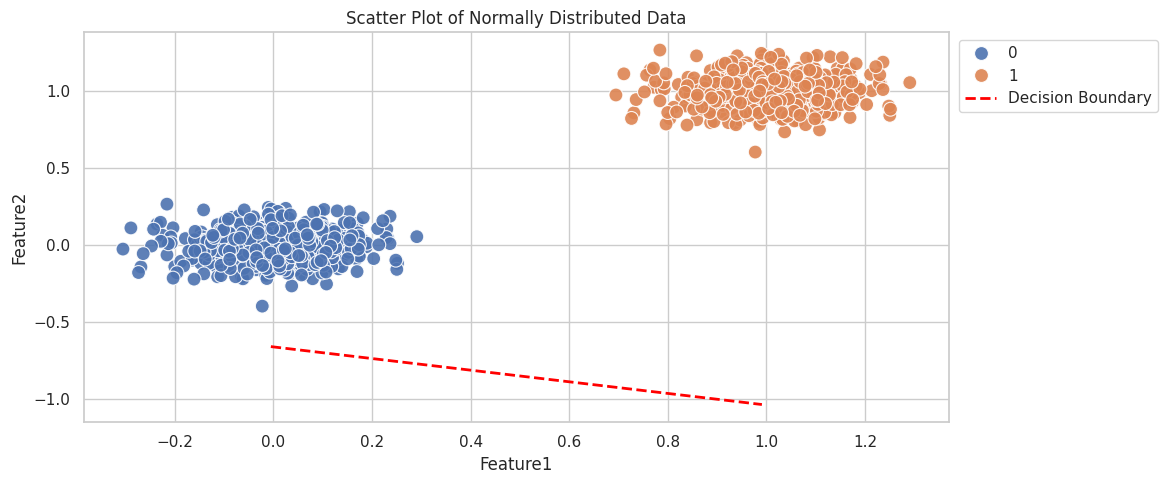

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = 0.37548312679072565 w1 = 0.28960258399160693 w2 = 0.7088736114949773
Loss at this epoch 22  is = 0.5629626188740601


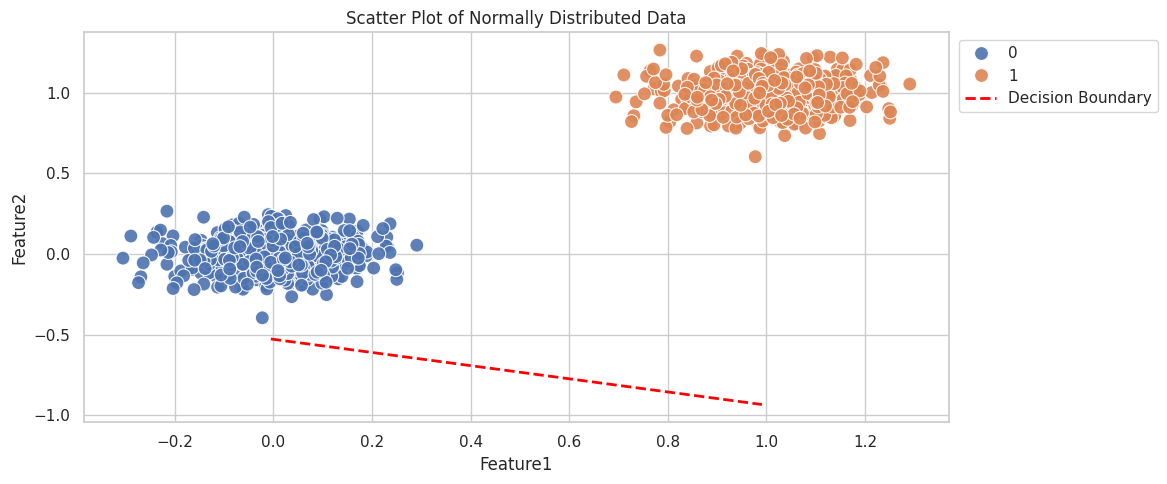

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = 0.27108207326823713 w1 = 0.3447500500841922 w2 = 0.763227971523098
Loss at this epoch 33  is = 0.5322979946804403


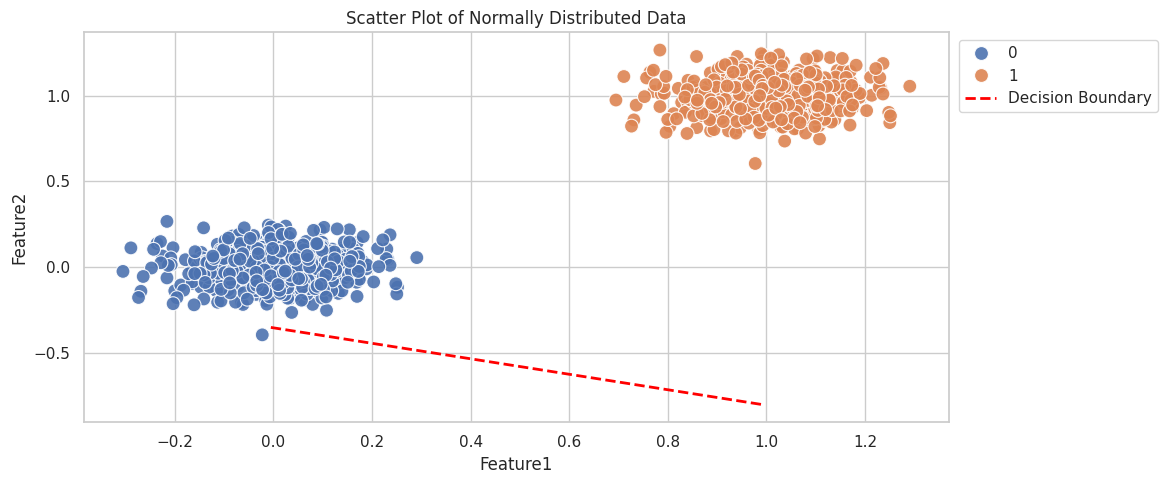

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = 0.1306562101935689 w1 = 0.4241782471975712 w2 = 0.841539446491582
Loss at this epoch 49  is = 0.49215704926819237


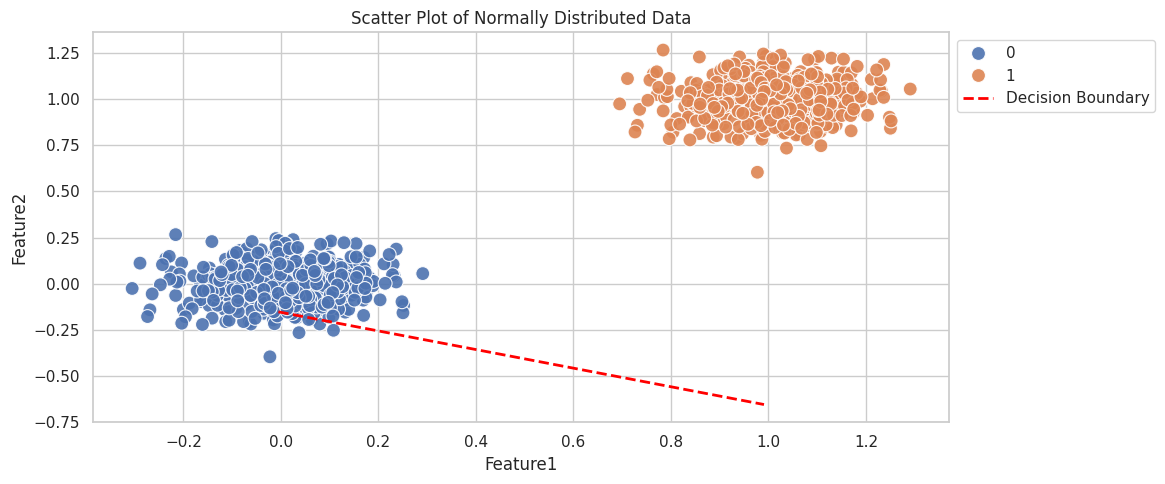

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = -0.0579680574783458 w1 = 0.5403569052120694 w2 = 0.9561254111319255
Loss at this epoch 73  is = 0.4403710216081414


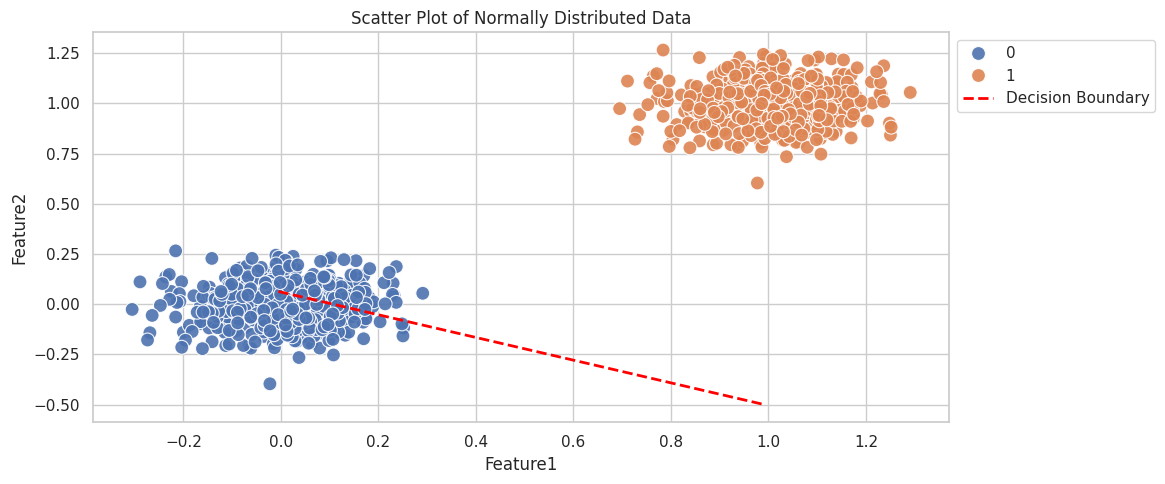

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = -0.30086589441984274 w1 = 0.7055066950576852 w2 = 1.119066521467208
Loss at this epoch 109  is = 0.37770416324691636


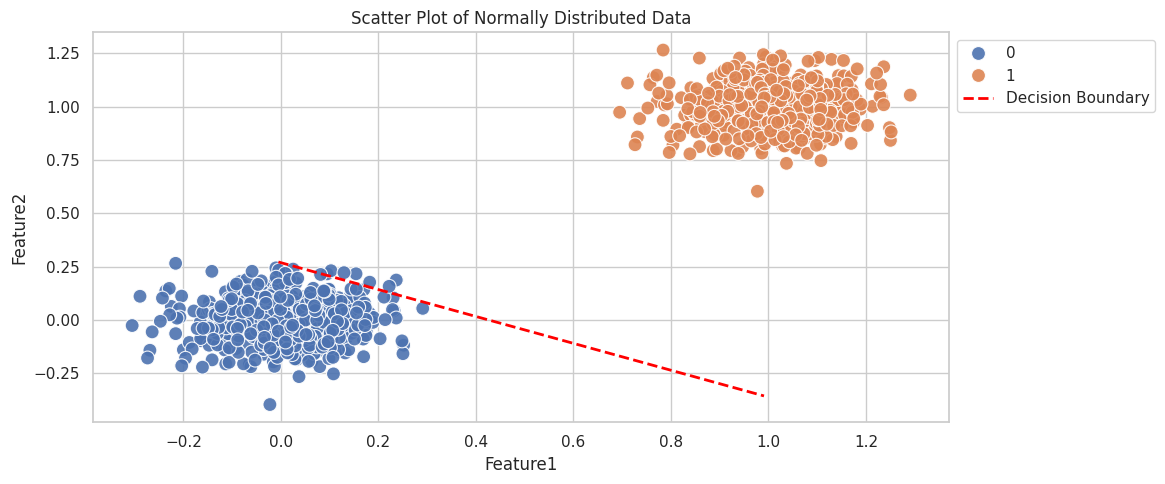

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = -0.5988067103203208 w1 = 0.9298031332505243 w2 = 1.3404215420992662
Loss at this epoch 163  is = 0.3079698449293046


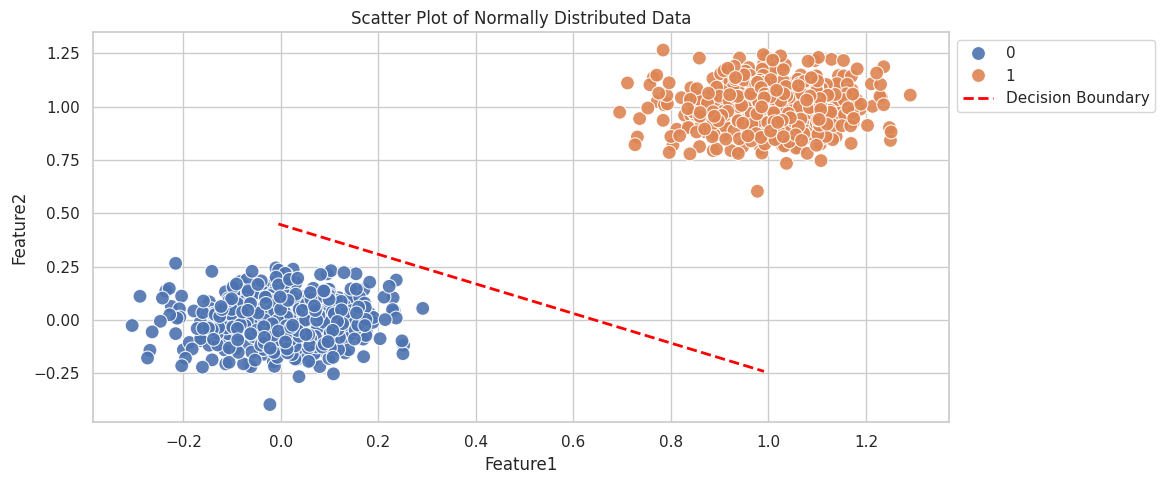

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = -0.9465172944290812 w1 = 1.2163258303472728 w2 = 1.6232296762539977
Loss at this epoch 244  is = 0.23788508272968334


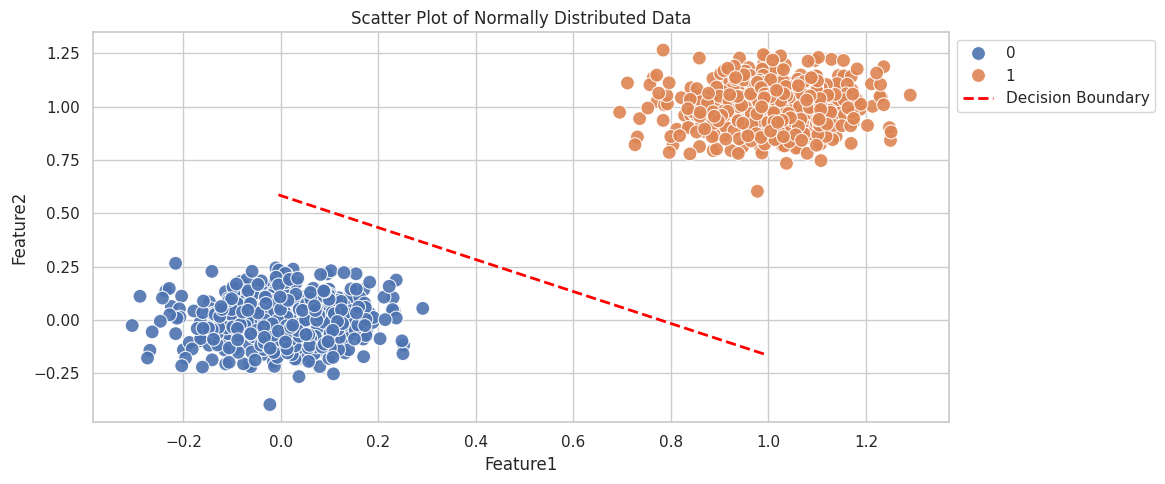

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = -1.335516950061516 w1 = 1.5595709946209102 w2 = 1.96204777919146
Loss at this epoch 366  is = 0.1745908314045946


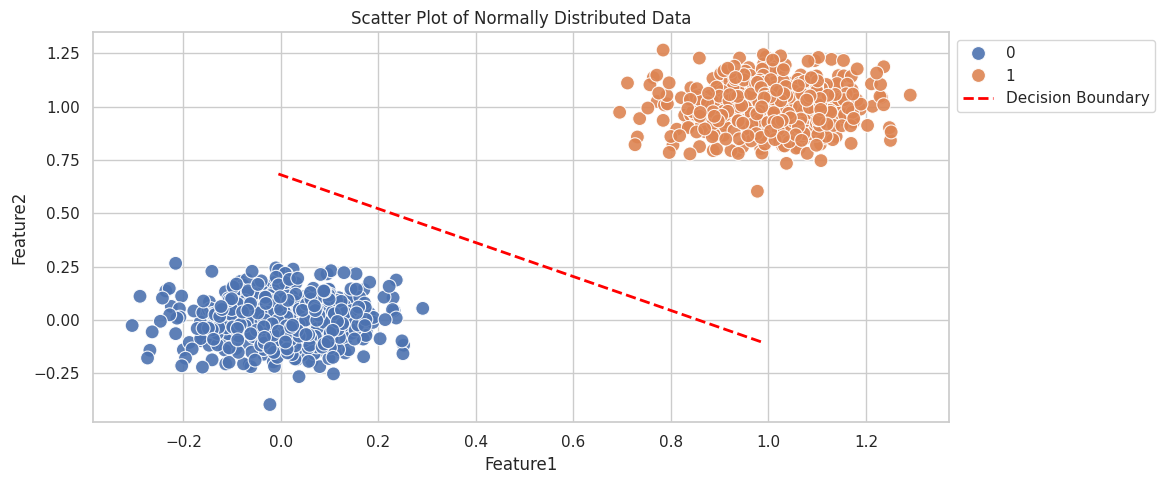

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = -1.7522692606298358 w1 = 1.9443869445514943 w2 = 2.3419246051214953
Loss at this epoch 549  is = 0.12323441815467048


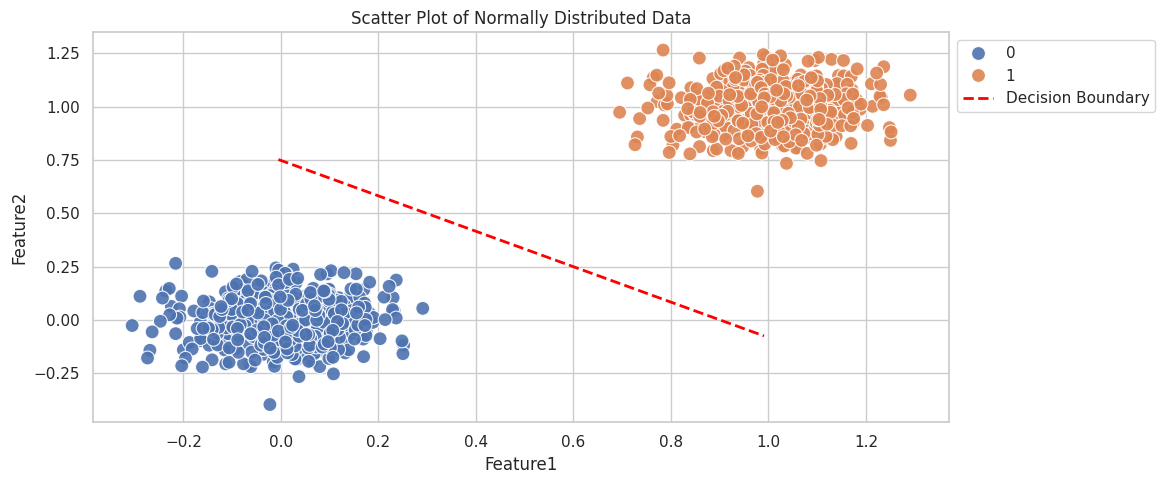

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = -2.185058017251189 w1 = 2.3553908293289854 w2 = 2.7477090326080775
Loss at this epoch 823  is = 0.0848189356397372


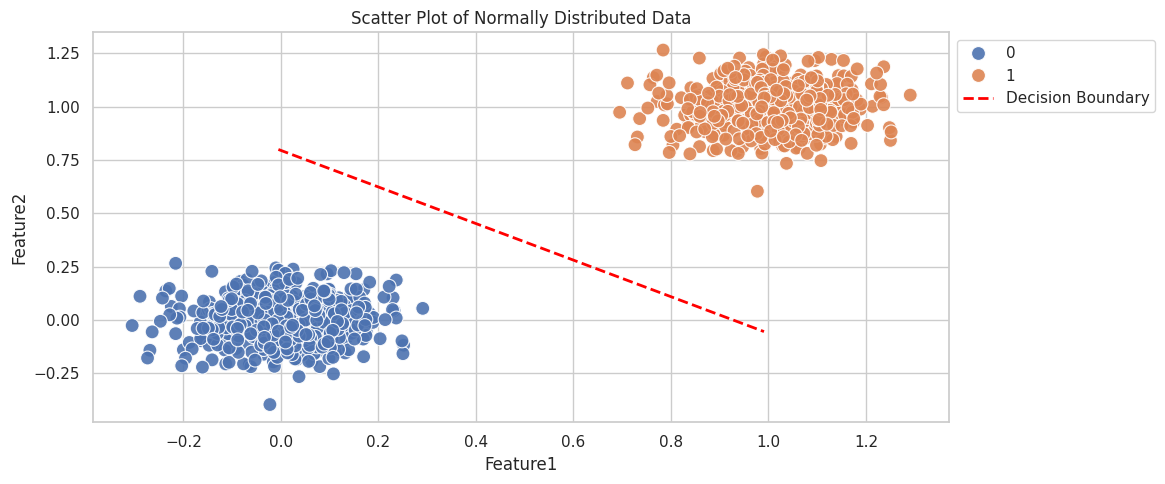

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = -2.6264899688760144 w1 = 2.781892971875691 w2 = 3.1688995874500736
Loss at this epoch 1234  is = 0.05753212658437495


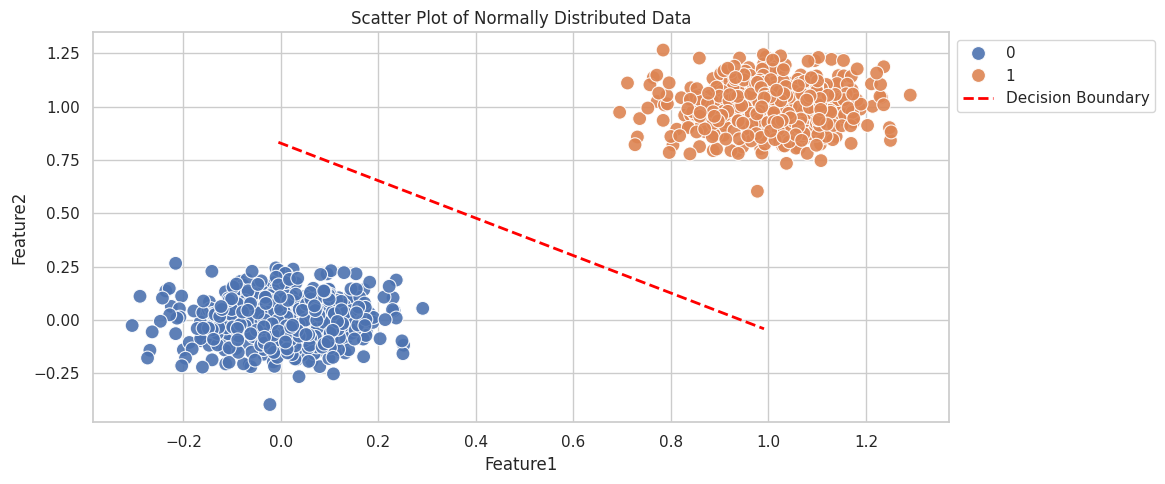

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = -3.0718012900500633 w1 = 3.2168276251686607 w2 = 3.598572379593698
Loss at this epoch 1851  is = 0.038750999393994276


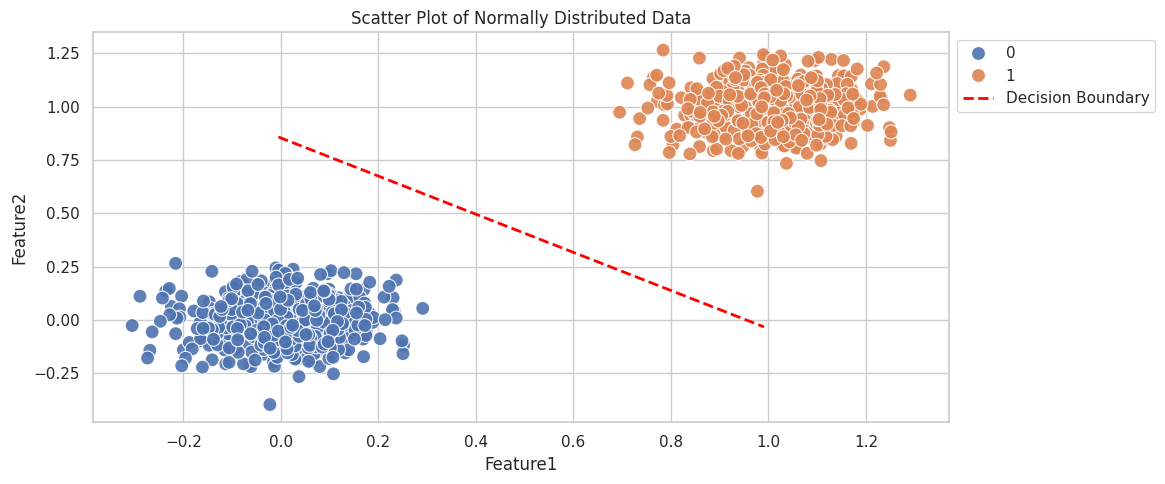

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
 
==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==
 
_______Running Gradient decent_______
new weights w0/bias = -3.4717417154838803 w1 = 3.61008030203851 w2 = 3.987234290999708
Loss at this epoch 2662  is = 0.027146189133020974


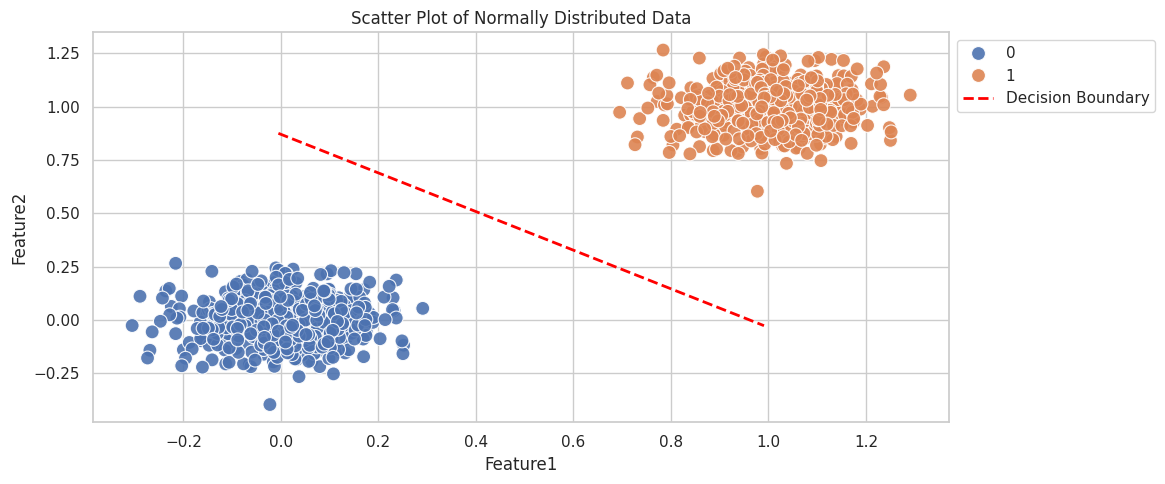

==XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX====XX==


In [119]:
cluster1 = Create_Cluster(0,0,0.1,0.1,500)
cluster2 = Create_Cluster(0.6+i*0.1,0.6+i*0.1,0.1,0.1,500)

X,Y = Create_X_Y(cluster1,cluster2)
#Create_plot(X,Y)
# Here I have Initialized W with Zeros could go for random also which i did in next question.

X = np.column_stack([np.ones(X.shape[0]), X])
W,Loss =  gradient_descent(X,Y)

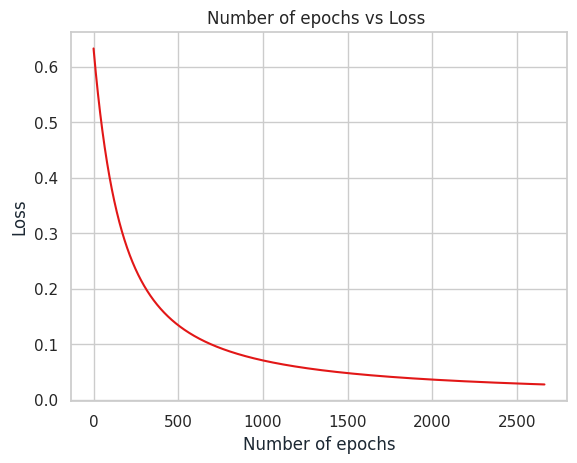

In [120]:
# Separability vs Changes required plot
Loss.pop(0)
plt.plot([i for i in range(len(Loss))],Loss,color='#E21717', label='K')
plt.title("Number of epochs vs Loss ")
plt.xlabel('Number of epochs', color='#1C2833')
plt.ylabel('Loss', color='#1C2833')
plt.show()

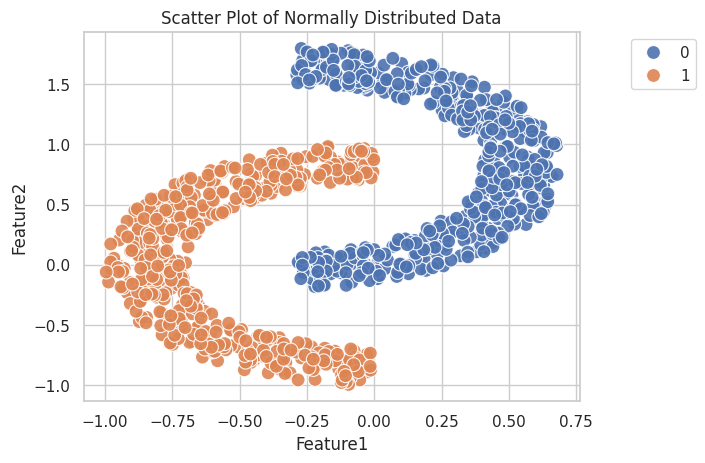

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a non-linear dataset with two classes
num_samples = 1000

# Class 1
theta_cluster1 = np.random.uniform(0, np.pi, num_samples // 2)
radius_cluster1 = np.random.uniform(0.7, 1, num_samples // 2)
X_cluster1 = np.column_stack((radius_cluster1 * np.sin(theta_cluster1) - 0.3,radius_cluster1 * np.cos(theta_cluster1) + 0.8))
#y_cluster1 = np.zeros(num_samples // 2)

# Class 2
theta_cluster2 = np.random.uniform(np.pi, 2 * np.pi, num_samples // 2)
radius_cluster2 = np.random.uniform(0.7, 1, num_samples // 2)
X_cluster2 = np.column_stack((radius_cluster2 * np.sin(theta_cluster2),radius_cluster2 * np.cos(theta_cluster2)))
#y_cluster2 = np.ones(num_samples // 2)

# Combine the classes
X,y = Create_X_Y(X_cluster1,X_cluster2)
#X = np.vstack((X_cluster1, X_cluster2))
#y = np.concatenate((y_cluster1, y_cluster2))

Create_plot(X,y)

In [122]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.biases_output
        self.predictions = self.sigmoid(self.output_input)

        return self.predictions

    def backward(self, X, y, learning_rate):
        # Backward pass
        error = y - self.predictions
        output_delta = error * (self.predictions * (1 - self.predictions))
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * (self.hidden_output * (1 - self.hidden_output))

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.biases_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.biases_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate


Epoch 0, Loss: 0.9649069363820792
Epoch 1000, Loss: 1.64489541102939
Epoch 2000, Loss: 1.679091288706689
Epoch 3000, Loss: 1.7098067208420602
Epoch 4000, Loss: 1.7408909056154616
Epoch 5000, Loss: 1.774723871431188
Epoch 6000, Loss: 1.8122809579725756
Epoch 7000, Loss: 1.8537265101090925
Epoch 8000, Loss: 1.8988509239414082
Epoch 9000, Loss: 1.9478888252188649


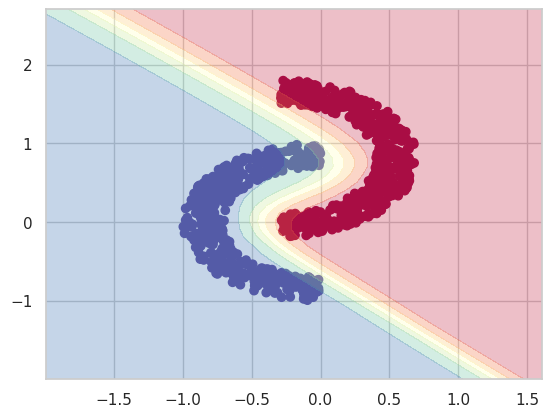

In [123]:
# Initialize MLP
input_size = 2  # 2 features (x, y)
hidden_size = 5  # Choose an appropriate size
output_size = 1  # Binary classification

mlp = MLP(input_size, hidden_size, output_size)

# Training loop
epochs = 10000
learning_rate = 0.01

for epoch in range(epochs):
    # Forward pass
    predictions = mlp.forward(X)

    # Backward pass
    mlp.backward(X, y.reshape(-1, 1), learning_rate)

    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
        print(f'Epoch {epoch}, Loss: {loss}')

# Plot the decision boundary
# (Note: This is a simple visualization and may not work well for more complex datasets)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = mlp.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Spectral)
plt.show()


Epoch 0, Loss: 0.9962633581853257
Epoch 1000, Loss: 1.709033233166507
Epoch 2000, Loss: 2.2764748064395812
Epoch 3000, Loss: 2.667739868036096
Epoch 4000, Loss: 2.8791595969665473
Epoch 5000, Loss: 3.015043065331302
Epoch 6000, Loss: 3.112490158264582
Epoch 7000, Loss: 3.187317594139545
Epoch 8000, Loss: 3.2475142508674018
Epoch 9000, Loss: 3.297593492397035


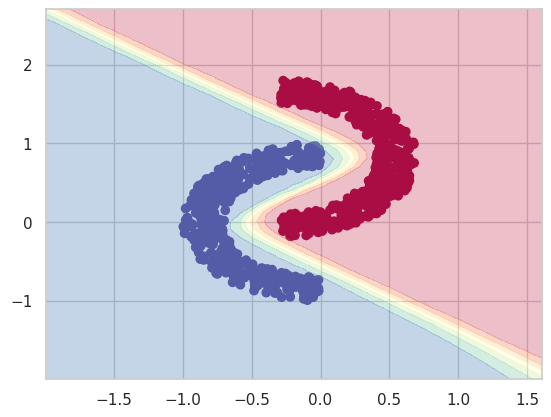

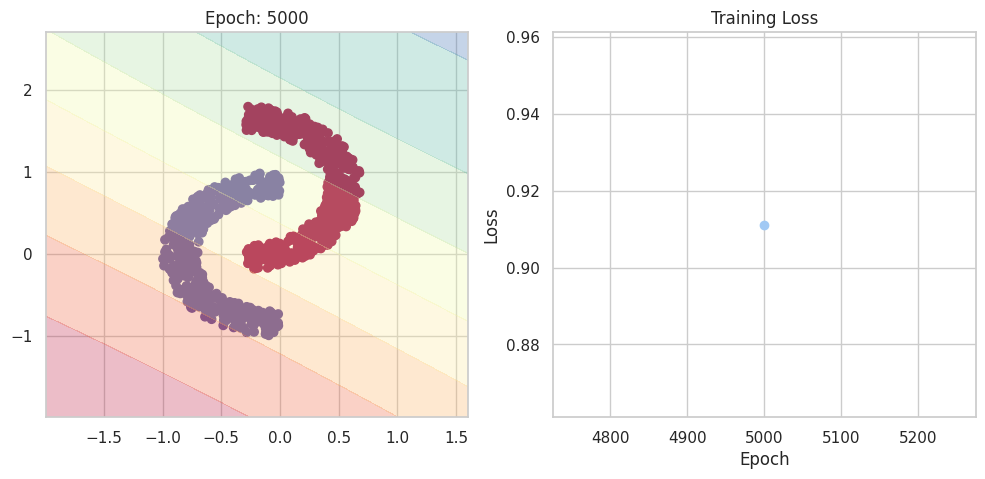

In [124]:
 import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

input_size = 2  # 2 features (x, y)
hidden_size = 5  # Choose an appropriate size
output_size = 1  # Binary classification

mlp = MLP(input_size, hidden_size, output_size)

# Training loop
epochs = 10000
learning_rate = 0.01

for epoch in range(epochs):
    # Forward pass
    predictions = mlp.forward(X)

    # Backward pass
    mlp.backward(X, y.reshape(-1, 1), learning_rate)

    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:

        loss = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
        print(f'Epoch {epoch}, Loss: {loss}')

# Plot the decision boundary
# (Note: This is a simple visualization and may not work well for more complex datasets)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = mlp.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Spectral)
plt.show()


# Initialize MLP
input_size = 2
hidden_size = 5
output_size = 1

mlp = MLP(input_size, hidden_size, output_size)

# Training loop
epochs = 5000
learning_rate = 0.01

# Create subplots for animation
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

def update_plot(epoch,X,y,mlp):
    predictions = mlp.forward(X)

    loss = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))

    # Update weights and biases
    mlp.backward(X, y.reshape(-1, 1), learning_rate)

    # Plot decision boundary
    axs[0].clear()
    axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = mlp.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[0].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Spectral)
    axs[0].set_title(f'Epoch: {epoch}')

    # Plot loss
    axs[1].plot(epoch, loss, 'bo')
    axs[1].set_title('Training Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')

# Create animation
update_plot(epochs,X,y,mlp)
animation = FuncAnimation(fig, update_plot, frames=epochs, interval=50, repeat=False)

# Display the animation
plt.show()


In [125]:
  |

SyntaxError: invalid syntax (<ipython-input-125-4b37ef281455>, line 1)